<a href="https://colab.research.google.com/github/cbertolasio/geospatial-datascience-quickstart/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Performing Spatial operations like a Pro

## Installations

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to use. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. These are the libraries we need to install in this tutorial:

Gdal
Geopandas
Folium

The installation might take 1 minute.


In [3]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
# !pip install descartes 

!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

# Install Folium for Geographic data visualization
!pip install folium 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state info

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os

## Data 

The dataset for this chapter is stored in the dropbox link. It is a valuable skill to learn how to access data on the web, so we will use WGET. WGET is great utility in accessing files from the web and supports different protocols. 



In [5]:
# Get the data from dropbox link
!wget https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip

--2022-10-20 22:41:17--  https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip [following]
--2022-10-20 22:41:18--  https://www.dropbox.com/s/raw/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee66da3d6e4546ea132fafd68a.dl.dropboxusercontent.com/cd/0/inline/BvPz7A7K0yxbnzlVZ7NQ1SAGw9tJlIkyFZ6p1naKn0i4TsK_TE2wt6YVUoSTfELApxAROGANdqFCJPw6RUsOaTxjWqTm4R7WRytvx6K4SwoErC3ZWbj-8GSvmpm2xvmvVa_V_JSJtLV5cQPeAZC3FeEzi44NTmhHhaAJGeWRRxCXdQ/file# [following]
--2022-10-20 22:41:18--  https://ucee66da3d6e4546ea132fafd68a.dl.dropboxusercontent.com/cd/0/inline/BvPz7A7K0yxbnzlVZ7NQ1SAGw9tJlIkyFZ6p1naKn0i4Ts

In [25]:
# see the folders available
import os
os.listdir(os.getcwd())

['.config',
 'Foursquare_2014_NYC.zip',
 'dataset_TSMC2014_NYC.txt',
 'nyc_districts.geojson',
 'sample_data']

In [7]:
# We have zipped data so let us unzip it
!unzip Foursquare_2014_NYC.zip

Archive:  Foursquare_2014_NYC.zip
  inflating: dataset_TSMC2014_NYC.txt  


In [8]:
# Reading the nyc foursquare data

# create column names as this comes without headers
col_names = ['UserID', 'VenueID', 'VenueCategoryID', 'VenueCategoryName', 'Latitude', 'Longtitude','Timezone', 'UTCtime']

# read the csv with pandas. the data comes in tab seperator. 
nyc = pd.read_csv('dataset_TSMC2014_NYC.txt',names=col_names,sep="\t",  encoding = "ISO-8859-1" )

# Look at the first 5 rows
nyc.head()


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [9]:
# shape of the data (rows, columns)
nyc.shape

(227428, 8)

## Geometry and Coordinates

Geographic coordinates and Geometry objects are the glue that holds together all location data. Geometry objects define shapes in spatial locations: Points, Lines, Polygons and their multi-parts. In another way, we can say that Geographic Coordinates tell us about the locations while geometries hold their shapes. In any spatial operations, we need to have geometry and coordinates to carry out meaningful geographic analysis. 

In [10]:
# loop through first 5 rows, grap the latitude and longtitude as tuple and print them. 
for lat, lon in zip(nyc['Latitude'][:5], nyc['Longtitude'][:5]):
    geometry = lat, lon
    print(geometry)

(40.719810375488535, -74.00258103213994)
(40.60679958140643, -74.04416981025437)
(40.716161684843215, -73.88307005845945)
(40.7451638, -73.982518775)
(40.74010382743943, -73.98965835571289)


In [11]:
# loop through first 5 rows, grap the latitude and longtitude as tuple. Wrap it with Shapely Point Geometry and print them. 
for lat, lon in zip(nyc['Latitude'][:5], nyc['Longtitude'][:5]):
    geometry = Point(lat, lon)
    print(geometry)

POINT (40.719810375488535 -74.00258103213994)
POINT (40.60679958140643 -74.04416981025437)
POINT (40.716161684843215 -73.88307005845945)
POINT (40.7451638 -73.982518775)
POINT (40.74010382743943 -73.98965835571289)


In [12]:
# Save the geometry as a new feature

geometry = [Point(xy) for xy in zip(nyc['Longtitude'], nyc['Latitude'])]
geometry[:5]

### Coordinate Reference System (CRS)
Geographic Coordinate Reference Systems (CRS) indicate how location data is represented in two dimensional rather than 3-dimensional earth. Coordinate reference systems and projection from one reference to another is crucial in many location data analysis.

Most common used EPSG codes include EPSG:4326 and EPSG:3395 for world data projects. Usually, each country or region has different Local CRS and can be looked upon through EPSG code if you already know or location names at http://epsg.io/  or http://spatialreference.org . We will later perform projections but for now, we will simply use EPSG:4326 to demonstrate how we can create a Geodataframe.

In [13]:
# Create crs dictionary
crs = {'init': 'epsg:4326'}

### Create GeoDataFrame

Now we can easily create a GeoDatFrame since we have both Geometries and Coordinate reference systems.


In [14]:
nyc_gdf = gpd.GeoDataFrame(nyc, crs=crs, geometry=geometry)
nyc_gdf.head()


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (-74.00258 40.71981)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (-74.04417 40.60680)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (-73.88307 40.71616)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.98252 40.74516)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (-73.98966 40.74010)


Once you have a Geodataframe, it is easy to plot your data in a map using .plot() function in Geopandas

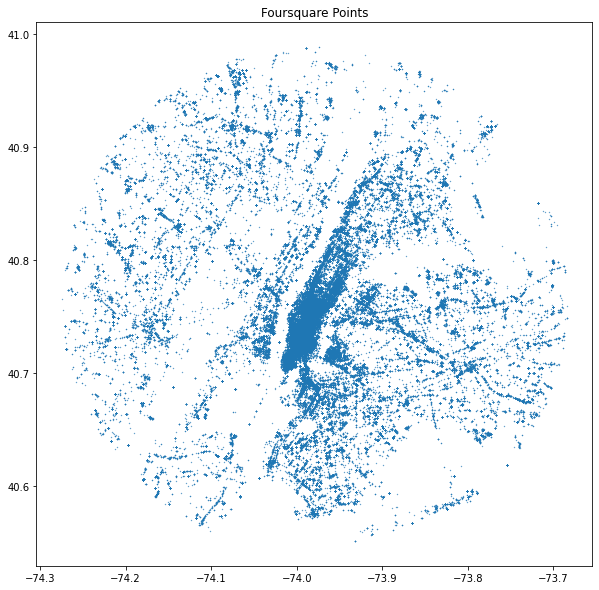

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
nyc_gdf.plot(markersize=0.1,ax=ax);
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title('Foursquare Points')
plt.show()

### Projections

 It is a common process to reproject data from one format like WGS84 to other formats. There are many different projections, some distort shapes, others distort size while other projections maintain an equal area size. This resource is very useful in visualizing how different projections transform data https://map-projections.net/imglist.php . In our case, we look for a metric projection suitable for new york city. The official EPSG website (http://epsg.io/ ) is very helpful in searching for relevant projections of your data via coordinates, location name, zip codes or EPSG code if you already know it. We will choose EPSG  32618 which has metre units and covers new york zone. To reproject our data is easy with Geopandas and we can simply pass the EPSG code to to_crs function.

In [17]:
# Depending on Google Colab Traffic, converting the whole dataset might take long time. 
# Convert to UTM metre based projection: https://epsg.io/32618 
nyc_gdf_proj = nyc_gdf.to_crs({'init': 'epsg:32618'})
nyc_gdf_proj.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (584239.326 4508132.470)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (580863.180 4495548.605)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (594338.236 4507848.949)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (585901.141 4510966.314)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (585304.835 4510397.659)


In [ ]:
# Sample conversion --> Convert to UTM metre based projection: https://epsg.io/32618 
#nyc_gdf_sample = nyc_gdf.sample(1000)
#nyc_gdf_proj = nyc_gdf_sample.to_crs({'init': 'epsg:32618'})
#nyc_gdf_proj.head()

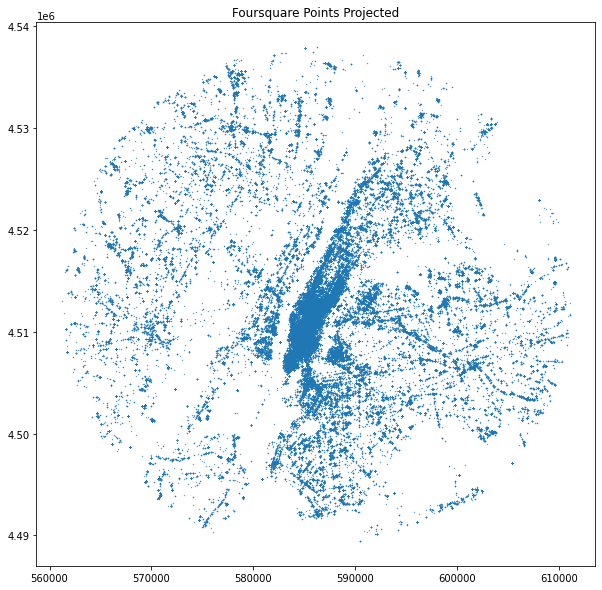

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
nyc_gdf_proj.plot(markersize=0.1,ax=ax);
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title('Foursquare Points Projected')
plt.show()

If you look closely and compare the geometry column of the projected data (nyc_gdf_proj) and non projected data above (nyc_gdf) you realize that they are in different format. Due to the projection, our data is transformed from decimal degrees into a metre based format.

## Buffer Analysis
Buffer analysis is one of the most used GIS spatial operations. It creates zones with a certain area around a point, line or polygon geometry according to specified buffer distance. For example, if we take one point from our projected Geodataframe we can create a buffer of 10 m, 50 m and 100 m around the point.  



In [19]:
point1 = nyc_gdf_proj[:1]
buf10 = point1.buffer(10)
buf50 = point1.buffer(50)
buf100 = point1.buffer(100)

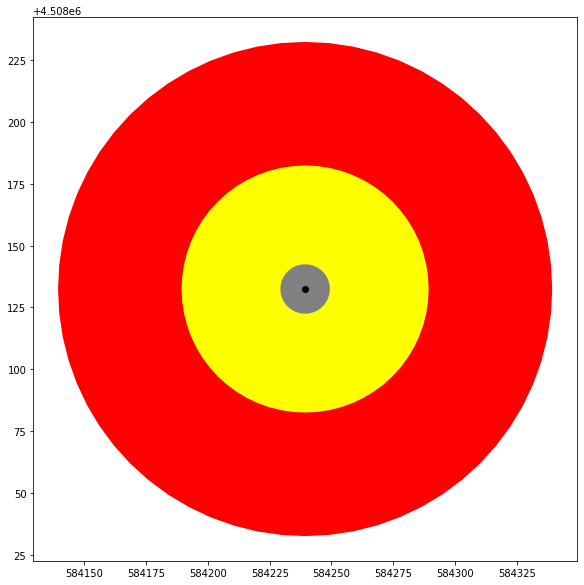

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
buf100.plot(color = 'red', ax=ax);
buf50.plot(ax=ax, color='yellow')
buf10.plot(ax=ax, color='gray');
point1.plot(ax=ax, color='black')
plt.show()

Let us get a subset of the data and buffer it. In this case we will subset all Subways in the dataset.

In [21]:
subway = nyc_gdf_proj[nyc_gdf_proj['VenueCategoryName']== 'Subway']

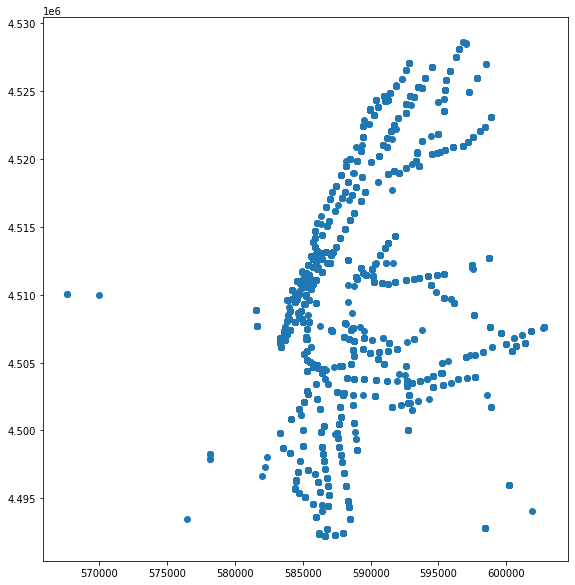

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
subway.plot(ax=ax)
plt.show()

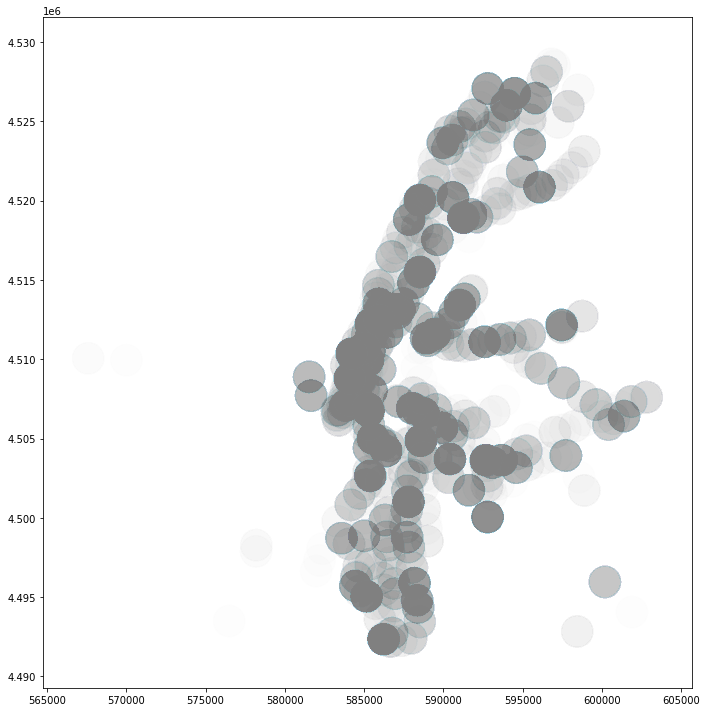

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
#subway.buffer(1000).plot(ax=ax, facecolor="none", edgecolor='Black');
subway.buffer(1000).plot(ax=ax, facecolor='grey',edgecolor='lightblue', alpha=0.01)
plt.tight_layout()
plt.show()

## Spatial join


We will perform spatial join with foursquare points and New York district polygons. 

In [26]:
# url_dist = 'http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nyad/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson'
url_dist = 'nyc_districts.geojson'
nyc_dist = gpd.read_file(url_dist)
nyc_dist.head()


,OBJECTID,AssemDist,Shape__Area,Shape__Length,geometry
0,1,34,5.549695e+07,60366.244237,"POLYGON ((-73.89191 40.76572, -73.89167 40.764..."
1,2,47,6.717310e+07,47467.275604,"POLYGON ((-73.97300 40.60882, -73.97259 40.606..."
2,3,48,7.374100e+07,51820.347851,"POLYGON ((-73.96092 40.62768, -73.95996 40.627..."
3,4,49,6.114401e+07,54424.138562,"POLYGON ((-73.99989 40.63790, -73.99909 40.637..."
4,5,54,7.937047e+07,73969.610179,"POLYGON ((-73.90878 40.69826, -73.90802 40.697..."


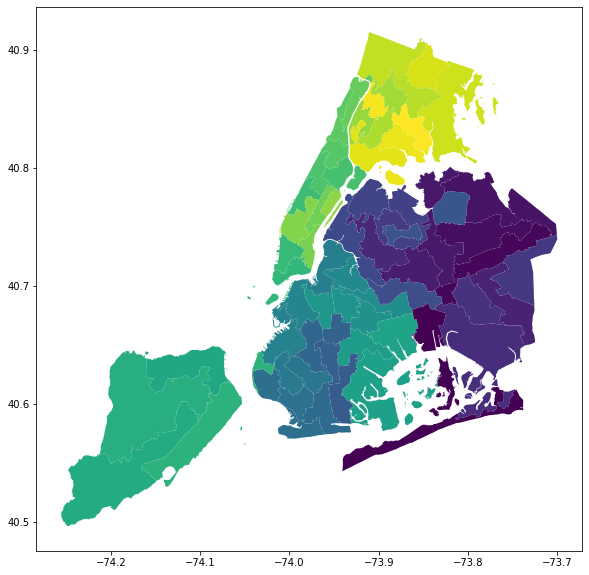

In [27]:
nyc_dist.plot(column='AssemDist', figsize=(12,10));

In [28]:
nyc_dist.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# Convert to UTM metre based projection: https://epsg.io/32618 
nyc_dist_proj = nyc_dist.to_crs({'init': 'epsg:32618'})
nyc_dist_proj.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,AssemDist,Shape__Area,Shape__Length,geometry
0,1,34,5.549695e+07,60366.244237,"POLYGON ((593521.935 4513340.769, 593543.830 4..."
1,2,47,6.717310e+07,47467.275604,"POLYGON ((586881.976 4495840.966, 586918.974 4..."
2,3,48,7.374100e+07,51820.347851,"POLYGON ((587878.920 4497946.553, 587960.155 4..."
3,4,49,6.114401e+07,54424.138562,"POLYGON ((584570.008 4499042.996, 584638.156 4..."
4,5,54,7.937047e+07,73969.610179,"POLYGON ((592191.778 4505834.831, 592255.835 4..."


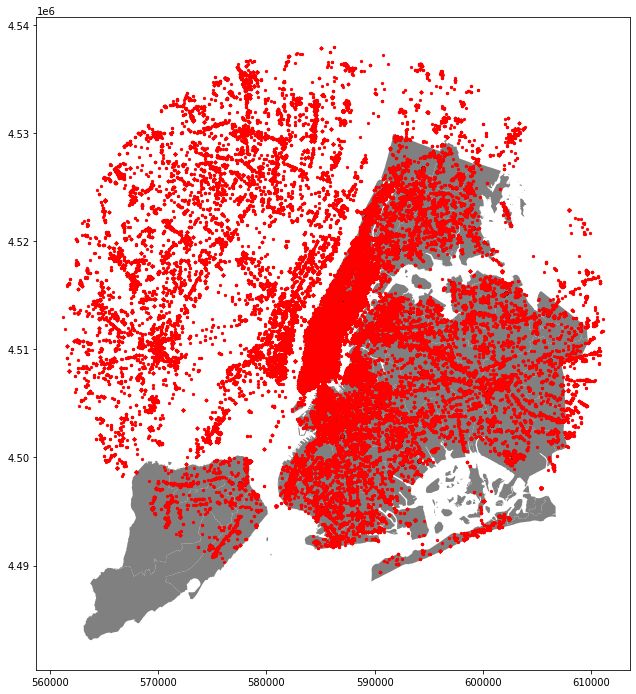

In [30]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(12,12))
nyc_dist_proj.plot(ax=ax, color='gray');
nyc_gdf_proj.plot(ax=ax, markersize=5, color='red');


To perform spatial join we will use Geopandas **.sjoin** function and provide both points and polygon dataset. The operation we will use is **within** since we are interested only on those points inside the polygon.

In [31]:
nyc_points = gpd.sjoin(nyc_gdf_proj, nyc_dist_proj, op='within')
nyc_points.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry,index_right,OBJECTID,AssemDist,Shape__Area,Shape__Length
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (584239.326 4508132.470),39,40,66,5.615979e+07,59130.399079
31,230,3fd66200f964a52035e41ee3,4bf58dd8d48988d1e5931735,Music Venue,40.731698,-73.989227,-240,Tue Apr 03 18:16:09 +0000 2012,POINT (585352.004 4509464.972),39,40,66,5.615979e+07,59130.399079


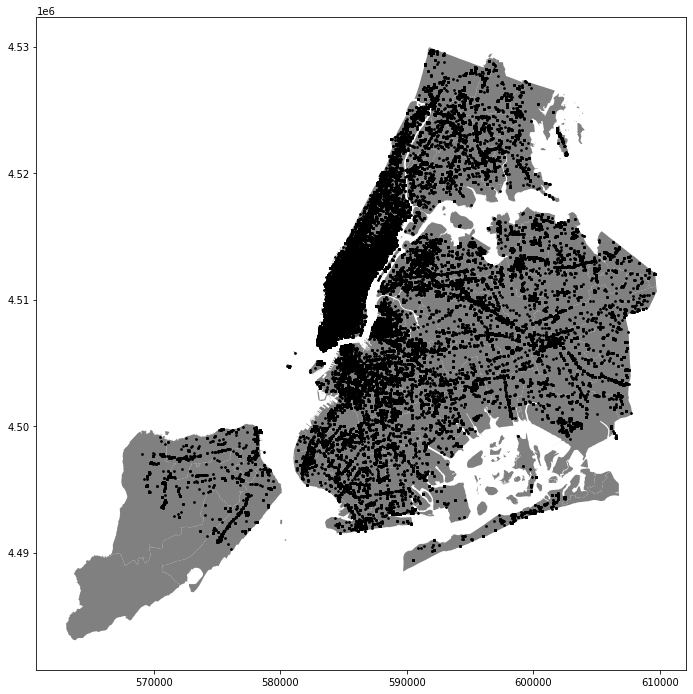

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
nyc_dist_proj.plot(ax=ax, color='gray');
nyc_points.plot(ax=ax, markersize=3, color='black');

## GeoVizualization


* Folium Basemap

In [33]:
m = folium.Map (
    location = [40.71981037548853, -74.00258103213994],
    #tiles='Mapbox Bright',
    #zoom_start = 11
)
m


In [34]:
folium.GeoJson(nyc_points.sample(1000)).add_to(m)
m

In [35]:
from folium.plugins import FastMarkerCluster
nyc_points_sample = nyc_points.sample(1000)
lons = nyc_points_sample['Longtitude'] 
lats = nyc_points_sample['Latitude']
m = folium.Map(
    location = [np.mean(nyc_points_sample.Latitude), np.mean(nyc_points_sample.Longtitude)],
    tiles= 'Stamen Toner',
    zoom_start=13
    )
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
folium.LayerControl().add_to(m)
m

#End